# Introduction to Genotype-Phenotype Map Module

This notebook a brief introduction to how the genotype-phenotype map module works. 

External imports for plotting and other utilities 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Imports from `gpm` module.

In [2]:
from seqspace.utils import encode_mutations, construct_genotypes, DNA

Let's define and arbitrary space. Everything in the cell below will typically be given to you by the experimental data.

In [13]:
# Wildtype sequence
wt = "AAA"

# Micro-managing here, stating explicitly what substitutions are possible at each site.
# See documentation for more detail.
mutations = {
    0:DNA,
    1:DNA,
    2:["A","T"]
}

# Generate encoding dictionary for each mutation
encoding = encode_mutations(wt, mutations)

# Construct genotypes from every possible combination of the substitutions above.
genotypes, binary = construct_genotypes(encoding)
print(genotypes)

# Generate random phenotype values
phenotypes = np.random.rand(len(genotypes))

['AAA' 'CAA' 'GAA' 'TAA' 'ACA' 'CCA' 'GCA' 'TCA' 'AGA' 'CGA' 'GGA' 'TGA'
 'ATA' 'CTA' 'GTA' 'TTA' 'AAT' 'CAT' 'GAT' 'TAT' 'ACT' 'CCT' 'GCT' 'TCT'
 'AGT' 'CGT' 'GGT' 'TGT' 'ATT' 'CTT' 'GTT' 'TTT']


## Creating a Genotype-phenotype map instance

Create an instance of the GenoPhenoMap object, passing in the wildtype sequence, genotypes and their phenotypes, and the substitution map. 

In [14]:
from seqspace.gpm import GenoPhenoMap

In [15]:
gpm = GenoPhenoMap(wt, # wildtype sequence
                   genotypes, # genotypes
                   phenotypes, # phenotypes
                   errors=None, # errors in measured phenotypes
                   log_transform=False, # Should the map log_transform the space?
                   mutations=mutations # Substitution map to alphabet 
)

## Construct NetworkX graph from GenoPhenoMap

`GenoPhenoMap` objects have an internal command to port to a NetworkX Graph object.

In [16]:
from networkx import draw, spring_layout

Automatically construct a graph using internal `gpm` method, `build_graph`.

In [17]:
gpm.build_graph()

Notice, `gpm` gains a new attribute, `Graph`, containing a full NetworkX object which contains all the properties of a normal NetworkX DiGraph.

In [18]:
gpm.Graph

Attributes from the mapping objects are added to the network object when graph is constructed.

In [19]:
gpm.Graph.node[0]

{'binary': '0000000',
 'errors': None,
 'genotype': 'AAA',
 'phenotype': 0.8529515206472703,
 'value': 0.8529515206472703}

In [20]:
print(gpm.Graph.node[0])
print(gpm.Graph.edge[0][1])

{'genotype': 'AAA', 'value': 0.8529515206472703, 'phenotype': 0.8529515206472703, 'errors': None, 'binary': '0000000'}
{'mutation': 'A0C'}


Draw a graph object following standing NetworkX procedure. 

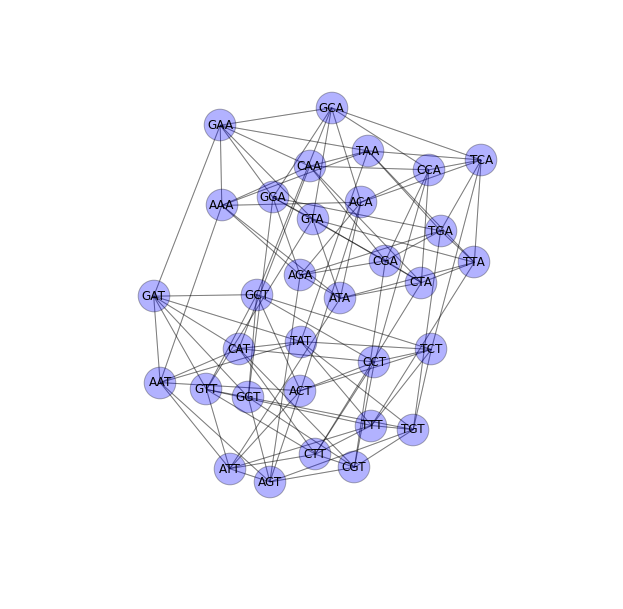

In [21]:
plt.figure(figsize=[8,8])

# Construct label dict
labels = dict([(i,gpm.Graph.node[i]["genotype"]) for i in range(len(gpm.Graph.nodes()))])
draw(gpm.Graph,
    with_labels=True, # add sequence labels
    node_color='b',   # color nodes blue
    labels = labels,
    pos=spring_layout(gpm.Graph), # spring loaded layout of nodes
    node_size=1000, # make node sizes bigger from default
    arrows=False,   # remove arrows from DiGraph
    alpha = 0.3     # lighten opacity of nodes
)

## Other cool functions in map object

Get mapping between attributes of the map

In [22]:
gpm.get_map("genotypes", "Binary.genotypes")

{'AAA': '0000000',
 'AAT': '0000001',
 'ACA': '0001000',
 'ACT': '0001001',
 'AGA': '0000100',
 'AGT': '0000101',
 'ATA': '0000010',
 'ATT': '0000011',
 'CAA': '1000000',
 'CAT': '1000001',
 'CCA': '1001000',
 'CCT': '1001001',
 'CGA': '1000100',
 'CGT': '1000101',
 'CTA': '1000010',
 'CTT': '1000011',
 'GAA': '0100000',
 'GAT': '0100001',
 'GCA': '0101000',
 'GCT': '0101001',
 'GGA': '0100100',
 'GGT': '0100101',
 'GTA': '0100010',
 'GTT': '0100011',
 'TAA': '0010000',
 'TAT': '0010001',
 'TCA': '0011000',
 'TCT': '0011001',
 'TGA': '0010100',
 'TGT': '0010101',
 'TTA': '0010010',
 'TTT': '0010011'}